# importing libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import math

In [3]:
# mypath = r'C:\Users\Admin\Desktop\colleger work\Semester2\AdvancePythonAI&MLTools(AML2203)\Final Project\Alldata\Parkinson'
# savepath = r'C:\Users\Admin\Desktop\colleger work\Semester2\AdvancePythonAI&MLTools(AML2203)\Final Project\Alldata\Parkinsoncsv'

mypath = r'C:\Users\Admin\Desktop\colleger work\Semester2\AdvancePythonAI&MLTools(AML2203)\Final Project\Alldata\Healthy'
savepath = r'C:\Users\Admin\Desktop\colleger work\Semester2\AdvancePythonAI&MLTools(AML2203)\Final Project\Alldata\Healthycsv'

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
newfiles = []
for i in onlyfiles:
    
    newfiles.append(i)

In [33]:
# print(newfiles)
mypath+newfiles[0]

'C:\\Users\\Admin\\Desktop\\colleger work\\Semester2\\AdvancePythonAI&MLTools(AML2203)\\Final Project\\Alldata\\Parkinson0002-1.jpg'

In [5]:
for iname in newfiles:
    dataStoredAt = '{}\{}'
    dataStoredAt = dataStoredAt.format(savepath,'diseased.csv')  
    fpath = '{}\{}'
    fpath = fpath.format(mypath,iname)
    img = cv2.imread(fpath)
    lower = np.array([0,70,52])
    upper = np.array([163,255,255])
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    output = cv2.bitwise_and(img,img, mask= mask)
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        
        cv2.drawContours(img,[cnt],-1, (0, 0, 255), 3)
    spath = '{}\{}'
    spath = spath.format(savepath,iname)
    cv2.imwrite(spath, img)
    conts = []
    for i in contours:
        if len(i)>200:
            print(len(i))
            conts.append(i)
    print(len(conts))
    if len(conts)>0:
        newconts = np.array_split(conts[0],30)
    
        length = 0
        alllengths = []
        allcont = []
        checkpoints = []
        for i in newconts:
            for j in range(len(i)):
                if j!= len(i)-1:
                    length+= math.sqrt(math.pow((i[j+1][0][0]-i[j][0][0]),2)+math.pow((i[j+1][0][1]-i[j][0][1]),2))
            displacement = math.sqrt(math.pow((i[-1][0][0]-i[0][0][0]),2)+math.pow((i[-1][0][1]-i[0][0][1]),2))
            checkpoints.append([i[-1][0][0],i[-1][0][1]])
            alllengths.append([length,displacement])
            
            length = 0
        # print(alllengths)
        # print(checkpoints)
        diff = []
        f = open(dataStoredAt,'a')
        f.write(str(iname)+',')
        for i in alllengths:
            dif = ((i[0]-i[1])/i[1])*100
            f.write(str(dif)+',')
            diff.append(dif)
        f.write('\n')
        f.close()
    # print(diff)
                

497
247
844
1097
734
5
237
210
1018
1310
223
639
6
215
570
3490
3
205
448
3405
3
699
363
275
250
4
218
279
323
577
386
5
1479
916
2
1046
548
554
3
264
265
570
619
516
926
267
7
246
298
265
238
430
832
368
305
8
282
285
339
466
242
360
982
7
252
676
336
1063
4
364
224
274
3
213
214
514
3
215
244
341
333
4
662
531
2
320
1191
1332
3
430
455
716
269
1645
5
447
350
338
715
1247
5
385
278
574
832
214
643
6
284
241
224
222
4
416
658
2
245
393
219
424
4
576
291
475
3
220
473
1485
1594
4
232
216
1069
572
458
1362
6
4030
1
376
1038
2737
3
332
431
372
394
4
569
510
805
3
1337
747
2
802
1484
2
237
666
279
767
427
938
6
244
459
220
935
1384
558
6
233
3358
2
474
2692
671
3
647
384
464
3
202
249
986
3
227
208
451
204
969
5
259
1431
2
204
559
292
1291
712
355
6
478
221
203
575
384
549
649
7
477
283
683
1579
486
5
576
201
835
2343
4
275
334
327
332
4
272
281
201
316
505
5
274
692
1090
3
265
303
1684
3
771
450
214
1279
221
720
6
1005
1453
589
3
285
443
618
712
1711
5
1425
2652
2
234
330
566
3
221
238
21

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


# loading the image file

In [2]:
img = cv2.imread(r'C:\Users\Admin\Desktop\colleger work\Semester2\AdvancePythonAI&MLTools(AML2203)\Final Project\Parkinson\Meander_HandPD\MeanderPatients\0016-8.jpg')


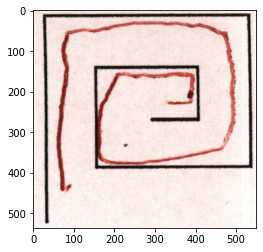

In [3]:
plt.imshow(img)

# setting up the HSV bounds

In [4]:
lower = np.array([0,70,52])
upper = np.array([163,255,255])
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower, upper)
output = cv2.bitwise_and(img,img, mask= mask)

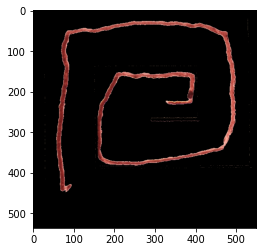

In [6]:
plt.imshow(output)

# Contouring

In [8]:
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    
    cv2.drawContours(img,[cnt],-1, (0, 0, 255), 3)

In [9]:
print(len(contours))

182


In [10]:
conts = []
for i in contours:
    if len(i)>100:
        print(len(i))
        conts.append(i)
print(len(conts))
newconts = np.array_split(conts[0],30)

        

1510
1


In [11]:
len(newconts)
for i in newconts:
    print(len(i))

51
51
51
51
51
51
51
51
51
51
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50


# Calculating the length of the contours

In [12]:
import math
length = 0
alllengths = []
allcont = []
checkpoints = []
for i in newconts:
    for j in range(len(i)):
        if j!= len(i)-1:
            length+= math.sqrt(math.pow((i[j+1][0][0]-i[j][0][0]),2)+math.pow((i[j+1][0][1]-i[j][0][1]),2))
    displacement = math.sqrt(math.pow((i[-1][0][0]-i[0][0][0]),2)+math.pow((i[-1][0][1]-i[0][0][1]),2))
    checkpoints.append([i[-1][0][0],i[-1][0][1]])
    alllengths.append([length,displacement])
    
    length = 0
print(alllengths)
print(checkpoints)
diff = []
for i in alllengths:
    diff.append(((i[0]-i[1])/i[1])*100)
print(diff)

[[134.35533905932732, 125.15989773086265], [126.4264068711928, 95.38343671728336], [149.76955262170046, 139.51702405083043], [196.76955262170057, 167.45148551147582], [129.0832611206852, 97.16480844420988], [159.01219330881977, 145.41664278891878], [148.1837661840736, 136.13228860193308], [122.35533905932733, 111.6288493177279], [173.7695526217005, 163.11039206623224], [107.35533905932732, 98.48857801796105], [131.18376618407353, 120.61923561356207], [134.35533905932735, 124.32618388738553], [87.84062043356592, 68.60029154456998], [126.18376618407353, 116.90166808048549], [133.18376618407353, 122.03687967167957], [132.01219330881975, 119.01680553602503], [84.9116882454314, 77.3692445355388], [114.59797974644663, 100.12492197250393], [161.0832611206852, 81.32035415564789], [189.5979797464467, 73.53910524340094], [165.0121933088198, 153.0294089382822], [93.84062043356589, 75.07329751649384], [169.08326112068534, 152.0690632574555], [141.84062043356596, 107.07940978544848], [152.769552621

In [13]:
new = np.reshape(conts, -1)
new = np.reshape(new,(-1,2))
new

array([[246,  27],
       [245,  28],
       [241,  28],
       ...,
       [266,  28],
       [251,  28],
       [250,  27]], dtype=int32)

# Checking up the movement of the contour points

In [12]:
img2 = np.zeros([500,500,3])
img2

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

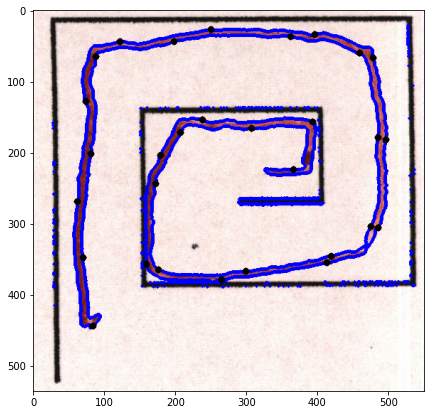

In [14]:
plt.figure(figsize=(7,7))
img3 = img.copy()
for i in checkpoints:
    img3 = cv2.circle(img3,i,2,(0,0,0),5)
plt.imshow(img3)
    

230


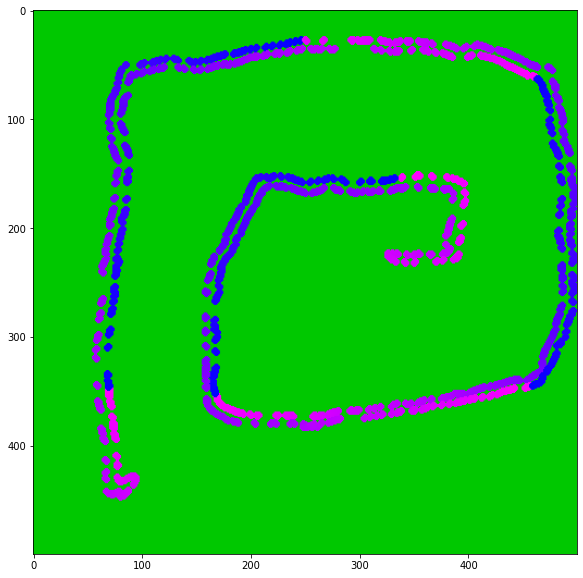

In [14]:

plt.figure(figsize=(10,10))
img2 = np.zeros([500,500,3], np.uint8)
img2[:,:,1] = 200

for i in conts:
    red = 0
    for j in i:
        center_coordinates = j[0]
        red+=1
        img2 = cv2.circle(img2, center_coordinates, 2, (red,0,255), 2)
        # print(red)
        if red>255:
            red = 0
plt.imshow(img2) 
print(red)  

In [15]:
conts[0][0][0]

array([246,  27], dtype=int32)

In [16]:
for i in conts:
    for j in i:
        print(j)
        

[[246  27]]
[[245  28]]
[[241  28]]
[[240  29]]
[[236  29]]
[[235  30]]
[[233  30]]
[[232  31]]
[[227  31]]
[[226  32]]
[[220  32]]
[[219  33]]
[[214  33]]
[[213  34]]
[[205  34]]
[[204  35]]
[[200  35]]
[[199  36]]
[[195  36]]
[[194  37]]
[[192  37]]
[[191  38]]
[[189  38]]
[[188  39]]
[[185  39]]
[[184  40]]
[[176  40]]
[[175  41]]
[[173  41]]
[[172  42]]
[[169  42]]
[[168  43]]
[[166  43]]
[[165  44]]
[[164  44]]
[[163  45]]
[[160  45]]
[[159  46]]
[[154  46]]
[[153  47]]
[[149  47]]
[[148  48]]
[[146  48]]
[[145  47]]
[[144  47]]
[[143  46]]
[[133  46]]
[[132  45]]
[[130  45]]
[[129  44]]
[[122  44]]
[[121  45]]
[[117  45]]
[[116  46]]
[[113  46]]
[[112  47]]
[[110  47]]
[[109  48]]
[[102  48]]
[[101  49]]
[[99 49]]
[[98 50]]
[[85 50]]
[[81 54]]
[[81 55]]
[[80 56]]
[[80 57]]
[[79 58]]
[[79 61]]
[[78 62]]
[[78 66]]
[[77 67]]
[[77 71]]
[[76 72]]
[[76 73]]
[[75 74]]
[[75 76]]
[[73 78]]
[[73 79]]
[[72 80]]
[[72 81]]
[[71 82]]
[[71 85]]
[[70 86]]
[[70 87]]
[[71 88]]
[[70 89]]
[[70 90]]


In [17]:
conts

[array([[[246,  27]],
 
        [[245,  28]],
 
        [[241,  28]],
 
        ...,
 
        [[266,  28]],
 
        [[251,  28]],
 
        [[250,  27]]], dtype=int32)]

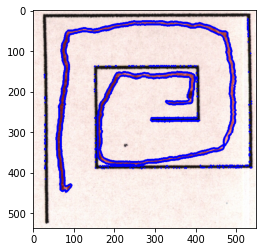

In [18]:
plt.imshow(img)

In [19]:
a = np.array([[1,2],[3,4],[5,6]])
b = np.array([[1,2],[3,4],[5,6]])